In [1]:
import pandas as pd
import numpy as np
import nltk
import wordcloud
import datetime
import sys
import os
from nltk.stem import WordNetLemmatizer
sys.path.append(os.path.abspath(os.path.join('..'))) # Adding racine path of project to sys.path
from src.preprocessing import *
from src.visualization import *
from nltk.corpus import stopwords, words
import warnings
from pandarallel import pandarallel
from textblob import TextBlob

warnings.filterwarnings('ignore')

In [2]:
df2 = preprocess2('../data/df1.csv')
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 845770 entries, 2020-06-05 14:30:54+00:00 to 2011-05-12 04:00:00+00:00
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   headline         845770 non-null  object
 1   url              845770 non-null  object
 2   publisher        845770 non-null  object
 3   stock            845770 non-null  object
 4   headline_length  845770 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.7+ MB


,headline,url,publisher,stock,headline_length
date,,,,,
2020-06-05 14:30:54+00:00,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,39
2020-06-03 14:45:20+00:00,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,42
2020-05-26 08:30:07+00:00,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,29
2020-05-22 16:45:06+00:00,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,44
2020-05-22 15:38:59+00:00,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,87


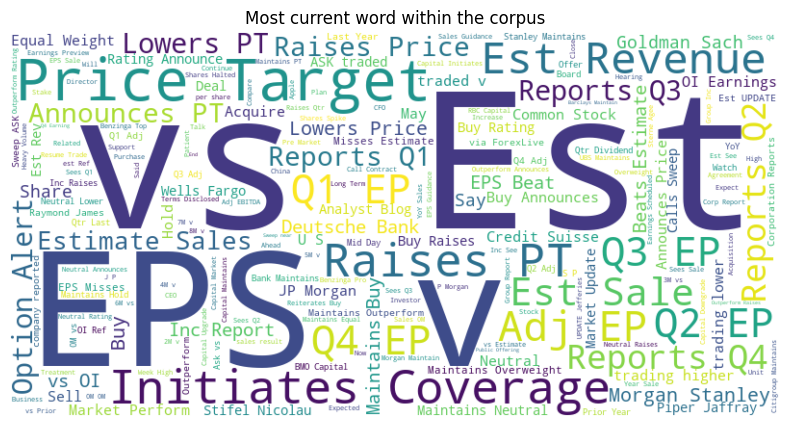

In [3]:
# Let's generate a wordcloud in order to see most current words
word_cloud(df2['headline'], 'Most current word within the corpus')

In [4]:
doc = df2['headline'].sample(1)
doc.values[0]

'BofA Earlier Downgraded Asbury Auto from Buy to Neutral and Genuine Parts from Neutral to Underperform'

### Feature engineering

In [5]:
# creation of a new feature 'headline" without stop words and possess stemmed words
if __name__ == '__main__':
   pandarallel.initialize(nb_workers=4) 
   df2['headline_new'] = df2['headline'].parallel_apply(process_text1) 

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [6]:
df2.to_csv('../data/df2.csv')